**XOR logic problem**

This neural network solves the XOR logic problem (the output is true only when both input values differ from each other). The table is shown below:<br>

| X1 | X2 | Y |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

THE LEARNING ALGORITHM
1. Initialize weights and biases randomly
2. Iterate over the data<br>
    i. Compute the output of neural network using sigmoid function<br>
    ii. Compute the loss using the square error loss function<br>
    iii. W(new) = W(old) — α ∆W<br>
    iv. B(new) = B(old) — α ∆B<br>
3. Repeat in order to get minimal error


Output from Xor neural network after 10000 epochs:
 [[0.07304485]
 [0.93084242]
 [0.93122512]
 [0.07564609]]


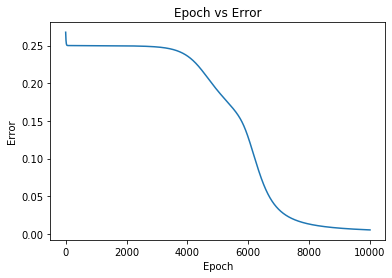

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
np.random.seed(1)


def sigmoid(x, deriv=False):
    if deriv:
        return x * (1 - x)
    return 1/(1 + np.exp(-x))


input_layer = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output_layer_expected = np.array([[0], [1], [1], [0]])
epochs = 10000
learn_rate = 0.1
weights = [np.random.rand(2, 2), np.random.rand(2, 1)]
bias_hidden = np.random.rand(1, 2)
bias_output = np.random.rand(1, 1)
errors = []

for i in range(epochs):
    # forward propagation
    hidden_layer = sigmoid(np.dot(input_layer, weights[0]) + bias_hidden)
    output_layer = sigmoid(np.dot(hidden_layer, weights[1]) + bias_output)
    # backpropagation
    error = output_layer_expected - output_layer
    errors.append(mean_squared_error(output_layer_expected, output_layer))
    d_output_layer = error * sigmoid(output_layer, True)
    d_hidden_layer = d_output_layer.dot(weights[1].T) * sigmoid(hidden_layer, True)
    # update weights and biases
    weights[1] += learn_rate * np.dot(hidden_layer.T, d_output_layer)
    bias_output += learn_rate * np.sum(d_output_layer, axis=0, keepdims=True)
    weights[0] += learn_rate * np.dot(input_layer.T, d_hidden_layer)
    bias_hidden += learn_rate * np.sum(d_hidden_layer, axis=0, keepdims=True)

print(f"Output from Xor neural network after {epochs} epochs:\n {output_layer}")
plt.plot(list(range(epochs)), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Epoch vs Error')
plt.show()